In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

data =load_breast_cancer()
data.data.shape

(569, 30)

In [2]:
LR_ = LR(solver ='liblinear',C =0.9,random_state = 420)
cross_val_score(LR_,data.data,data.target,cv =10).mean()

x_embedded = SelectFromModel(LR_,norm_order =1).fit_transform(data.data,data.target)
x_embedded.shape

(569, 9)

In [4]:
cross_val_score(LR_,x_embedded,data.target,cv =10).mean()

0.9368323826808401

(0.0, 30)
(0.10897274787330495, 17)
(0.2179454957466099, 12)
(0.32691824361991484, 10)
(0.4358909914932198, 8)
(0.5448637393665248, 8)
(0.6538364872398297, 5)
(0.7628092351131347, 5)
(0.8717819829864396, 5)
(0.9807547308597445, 5)
(1.0897274787330495, 5)
(1.1987002266063544, 4)
(1.3076729744796594, 3)
(1.4166457223529643, 2)
(1.5256184702262694, 2)
(1.6345912180995743, 1)
(1.7435639659728792, 1)
(1.8525367138461841, 1)
(1.961509461719489, 1)
(2.070482209592794, 1)


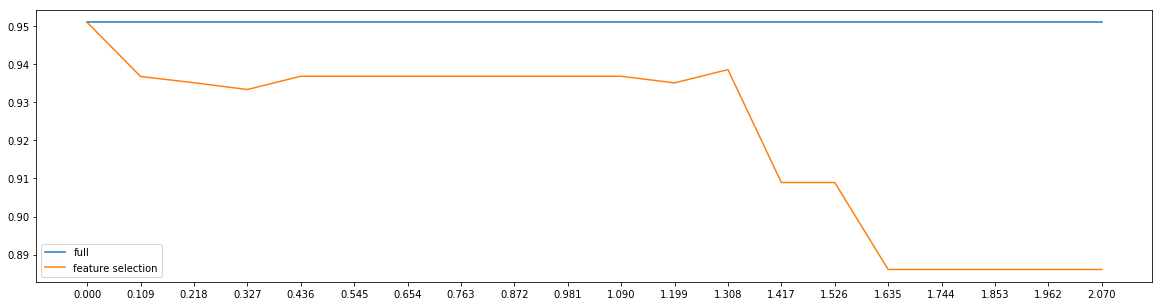

In [7]:
fullx = []
fsx = []

threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)

k =0
for i in threshold:
    x_embedded = SelectFromModel(LR_,threshold =i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv =5).mean())
    fsx.append(cross_val_score(LR_,x_embedded,data.target,cv =5).mean())
    print((threshold[k],x_embedded.shape[1]))
    k += 1
    
plt.figure(figsize = (20,5))
plt.plot(threshold,fullx,label = 'full')
plt.plot(threshold,fsx,label = 'feature selection')

plt.xticks(threshold)
plt.legend()
plt.show()

0.8897653616800622 2.01


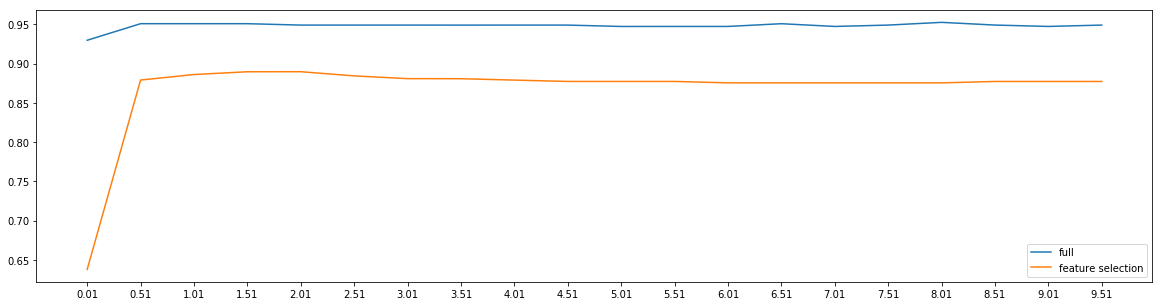

In [9]:
fullx = []
fsc = []

C = np.arange(0.01,10.01,0.5)

for i in C:
    LR_ = LR(solver ='liblinear',C =i,random_state =420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv =10).mean())
    x_enbedded = SelectFromModel(LR_,norm_order =1).fit_transform(data.data,data.target)
    fsc.append(cross_val_score(LR_,x_embedded,data.target,cv =10).mean())
    
print(max(fsc),C[fsc.index(max(fsc))])

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label = 'full')
plt.plot(C,fsc,label = 'feature selection')
plt.xticks(C)
plt.legend()
plt.show()

0.9473597787572379 1.6749999999999867


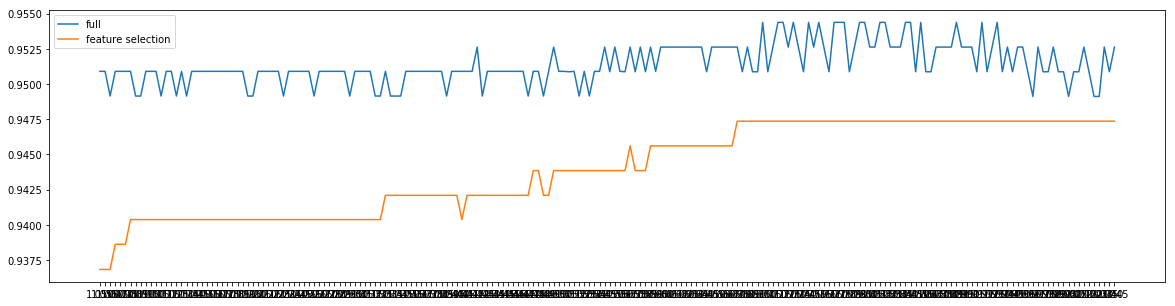

In [13]:
fullx =[]
fsc = []

C = np.arange(1.05,2.05,0.005)

for i in C:
    LR_ = LR(solver='liblinear',C =i,random_state =420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv =10).mean())
    
    x_embedded = SelectFromModel(LR_,norm_order = 1).fit_transform(data.data,data.target)
    fsc.append(cross_val_score(LR_,x_embedded,data.target,cv =10).mean())
    
print(max(fsc),C[fsc.index(max(fsc))])

plt.figure(figsize =(20,5))
plt.plot(C,fullx,label = 'full')
plt.plot(C,fsc,label = 'feature selection')
plt.xticks(C)
plt.legend()
plt.show()

In [14]:
LR_ = LR(solver = 'liblinear',C = 1.6749999999999867,random_state =420 )
cross_val_score(LR_,data.data,data.target,cv =10).mean()


0.9526240169388988

In [15]:
# 验证模型效果：降维之后
LR_ = LR(solver = 'liblinear',C = 1.6749999999999867,random_state =420 )
x_embedded = SelectFromModel(LR_,norm_order =1).fit_transform(data.data,data.target)
cross_val_score(LR_,x_embedded,data.target,cv =10).mean()


0.9473597787572379

In [16]:
x_embedded.shape

(569, 9)

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
for multi_class in ('multinomial','ovr'):
    clf = LR(solver = 'sag',max_iter = 100,random_state =42,
                            multi_class = multi_class
                            ).fit(iris.data,iris.target)
    
    print("train score:%.3f(%s)"%(clf.score(iris.data,iris.target),multi_class))

train score:0.987(multinomial)
train score:0.960(ovr)


E:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
